Computer Vision Object Dectection
Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.

# 네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [ ]:
import requests

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.

matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [ ]:
import json 

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [ ]:
subscription_key = '0193998749b44c7ba01fce150e9677f9'
vision_base_url = 'https://albuser10computervision.cognitiveservices.azure.com/vision/v2.0/'

In [ ]:
analyze_url = vision_base_url + 'analyze'

분석에 사용되는 이미지를 확인 합니다.

In [ ]:
image_url = 'https://museum.seoul.go.kr:8088/upload/ckeditor/2017/12/18/3c11b023-6e0e-4d40-9e1c-471bba97192a.JPG'

In [ ]:
con = requests.get(image_url).content
byte = BytesIO(con)
image = Image.open(byte)

#image = Image.open(BytesIO(requsets.get(image_url).content))

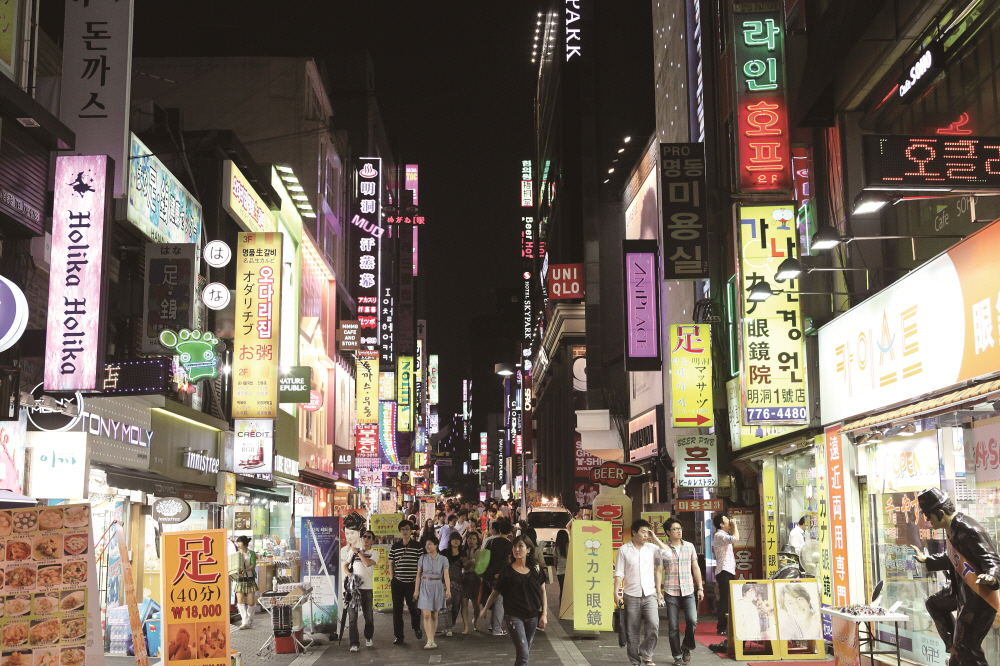

In [ ]:
image

https://learn.microsoft.com/ko-kr/azure/cognitive-services/computer-vision/

In [ ]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params  = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}

In [ ]:
response = requests.post(analyze_url, headers = headers, params = params, json = data) #get or post

In [ ]:
result = response.json()

In [ ]:
result

{'categories': [{'name': 'outdoor_street',
   'score': 0.671875,
   'detail': {'landmarks': []}}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'Black',
  'dominantColors': ['Black', 'White'],
  'accentColor': '9E5F2D',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['building',
   'outdoor',
   'street',
   'store',
   'many',
   'city',
   'filled',
   'walking',
   'bunch',
   'standing',
   'shop',
   'people',
   'woman',
   'display',
   'several',
   'man',
   'group',
   'night',
   'sign'],
  'captions': [{'text': 'a group of people walking down the street in front of a store',
    'confidence': 0.8410414749890249}]},
 'requestId': '8d8dfca0-c175-494c-b038-9a4f4ac88d5c',
 'metadata': {'height': 666, 'width': 1000, 'format': 'Jpeg'}}

In [ ]:
image_caption = result['description']['captions'],[0],['text']

In [ ]:
image_caption

([{'text': 'a group of people walking down the street in front of a store',
   'confidence': 0.8410414749890249}],
 [0],
 ['text'])

object Detection

In [ ]:
objectDetection_url = vision_base_url + 'detect'

In [ ]:
image_url = 'https://mblogthumb-phinf.pstatic.net/MjAyMDA5MDdfMjQ1/MDAxNTk5NDY1MjUxMjM4.zbBfDyquP67Utlw2d6pFOtHqnJyfkukH3PTDgDTg8Zkg.qQWiX02sgIaExMrU-guWXKDRsmnGBBxeS_bz2Ioy8YUg.PNG.vet6390/%EA%B0%95%EC%95%84%EC%A7%80_%EA%B3%A0%EC%96%91%EC%9D%B4_%ED%95%A8%EA%BB%98_%ED%82%A4%EC%9A%B0%EA%B8%B0.PNG?type=w800'

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))

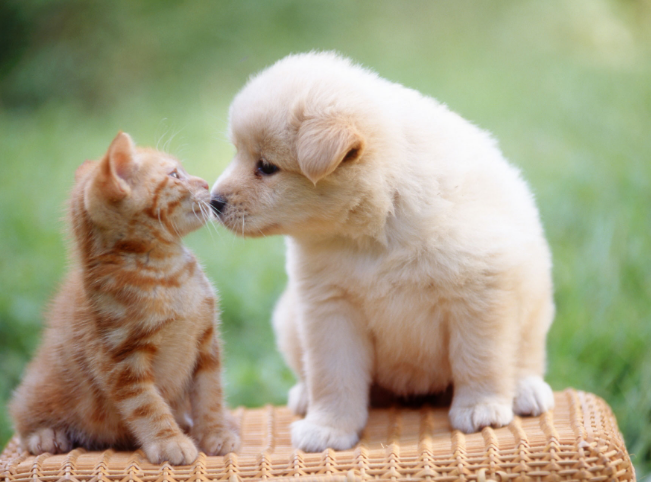

In [ ]:
image

In [ ]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params  = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}

In [ ]:
response = requests.post(objectDetection_url, headers = headers, params = params, json = data)

In [ ]:
result = response.json()
result

{'objects': [{'rectangle': {'x': 211, 'y': 35, 'w': 349, 'h': 407},
   'object': 'dog',
   'confidence': 0.543,
   'parent': {'object': 'mammal',
    'confidence': 0.929,
    'parent': {'object': 'animal', 'confidence': 0.949}}},
  {'rectangle': {'x': 8, 'y': 125, 'w': 237, 'h': 347},
   'object': 'cat',
   'confidence': 0.824,
   'parent': {'object': 'mammal',
    'confidence': 0.89,
    'parent': {'object': 'animal', 'confidence': 0.891}}}],
 'requestId': 'c41906b8-2f8f-4dae-864f-92f591fe6b1f',
 'metadata': {'height': 482, 'width': 651, 'format': 'Png'}}

In [ ]:
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

In [ ]:
# boundingBox를 위한 함수
def DrawBox(detectData):
  objects = detectData['objects']

  for obj in objects:
    print(obj)

    rect = obj['rectangle']
    print(rect)

    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w,y+h)), outline='red')

    objectName = obj['object']
    draw.text((x,y),objectName,fill='red')
    


In [ ]:
DrawBox(result)

{'rectangle': {'x': 211, 'y': 35, 'w': 349, 'h': 407}, 'object': 'dog', 'confidence': 0.543, 'parent': {'object': 'mammal', 'confidence': 0.929, 'parent': {'object': 'animal', 'confidence': 0.949}}}
{'x': 211, 'y': 35, 'w': 349, 'h': 407}
{'rectangle': {'x': 8, 'y': 125, 'w': 237, 'h': 347}, 'object': 'cat', 'confidence': 0.824, 'parent': {'object': 'mammal', 'confidence': 0.89, 'parent': {'object': 'animal', 'confidence': 0.891}}}
{'x': 8, 'y': 125, 'w': 237, 'h': 347}


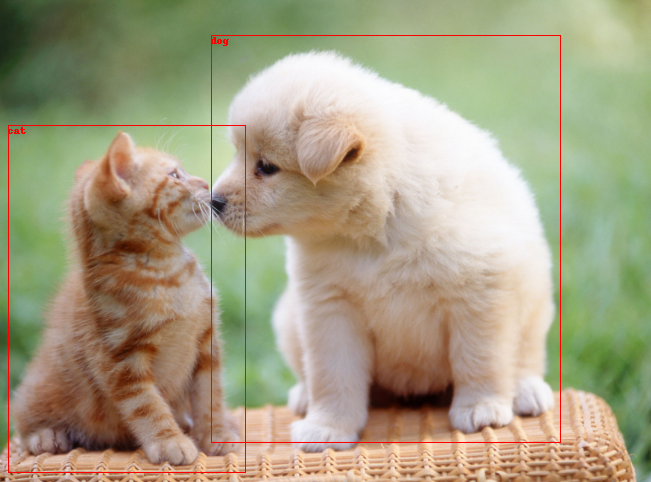

In [ ]:
image